In [1]:
from preprocessing import apply_OHE, init_OHE, init_dataset, standarize, eliminar_features, reduce_by_frequency

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import auxiliar as aux

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, plot_roc_curve

<h1>Red Neuronal</h1>

Los hiperpárametros que consideramos relevantes para un modelo como la Red Neuronal son:
   - activation: la función de activación
   - solver: función de optimización de pesos
   - hidden_layers_sizes: cantidad y tamaño de las capas escondidas de la red
   - learning_rate: tasa de aprendizaje inicial.
   - alpha: penalización del regularizador L2
   - tol: mejora mínima a realizarse en ciertas cantidad de iteraciones antes de detener el entrenamiento

<h3> Preprocesamiento 1: OHE + Estandarización  </h3>

Aplicaremos OHE a las columnas categoricas. Finalmente estandarizamos los datos.

In [2]:
X, y = aux.get_train_set()
X = init_dataset(X)

In [3]:
init_OHE(X)
X_p1 = apply_OHE(X)
X_p1 = standarize(X_p1)

In [4]:
X_train, X_validation, y_train, y_validation = train_test_split(
    X_p1, y, random_state=0, test_size=0.2, stratify=y
)

Buscamos los mejores hiperparametros para la Red Neuronal con GridSearchCV:

    - La métrica que se utiliza para comparar los modelos obtenidos en cada iteracion es roc_auc_score.
    - La mejor función de optimización de pesos obtenida en diferentes corridas con diferentes hiperparametros es Adam.
    - Las funciones de activación que mejor resultados tuvieron son tanh y logistic(sigmoidea), por lo que se limitaron las opciones a esos valores
    - Las hidden_layer_sizes con las que mejores resultados se obtuvieron fueron (30, 30) y (50, 50), por lo que se limitan las opciones a esos valores.
    - Los learning rates óptimos para las metricas que se calculan siempre se mantuvo entre 0.001 y 0.01, por lo se limitan las opciones a esos valores, además de mantenerse constante. 
    - Los alphas óptimos para las métricas que se calculan siempre se mantuvo entre 0.01 y 0.1, por lo se limitan las opciones a esos valores.
    - Las tolerancias óptimas para las métricas que se calculan siempre se mantuvo entre 0.00001 y 0.0001, por lo se limitan las opciones a esos valores.

In [5]:
parameters = {'activation': ['tanh', 'logistic'], 'solver':['adam'], 'hidden_layer_sizes': [(30,30), (50, 50)],
              'learning_rate_init': [0.001, 0.01], 'alpha':[0.01, 0.1], 'tol':[0.00001, 0.0001]}

clf = MLPClassifier(random_state=0)

gscv = GridSearchCV(
    clf,  parameters, scoring='roc_auc', n_jobs=-1, cv=5, return_train_score=True,
).fit(X_train, y_train)

In [6]:
print(f"Mejor score ROC-AUC en Entrenamiento: {gscv.best_score_}")
print(f"Mejores Parametros {gscv.best_params_}")

print(f"\nMejor score ROC-AUC en Validación: {gscv.score(X_validation, y_validation)}")

Mejor score ROC-AUC en Entrenamiento: 0.9089172151515159
Mejores Parametros {'activation': 'logistic', 'alpha': 0.1, 'hidden_layer_sizes': (50, 50), 'learning_rate_init': 0.01, 'solver': 'adam', 'tol': 1e-05}

Mejor score ROC-AUC en Validación: 0.8982583933472276


In [7]:
red_neuronal_p1 = gscv.best_estimator_
red_neuronal_p1

MLPClassifier(activation='logistic', alpha=0.1, hidden_layer_sizes=(50, 50),
              learning_rate_init=0.01, random_state=0, tol=1e-05)

Predecimos con el validation set:

In [8]:
y_pred_p1 = red_neuronal_p1.predict(X_validation)

### Métricas

In [9]:
print(classification_report(y_validation, y_pred_p1))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4945
           1       0.72      0.59      0.65      1568

    accuracy                           0.85      6513
   macro avg       0.80      0.76      0.77      6513
weighted avg       0.84      0.85      0.84      6513



Mostramos la matriz de confusión:

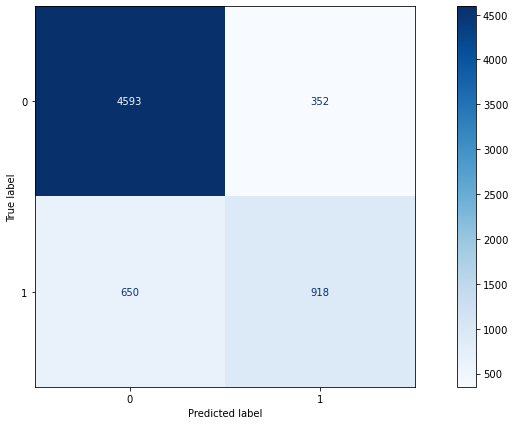

In [10]:
aux.plot_cm(red_neuronal_p1, X_validation, y_validation)

Mostramos la curva roc:

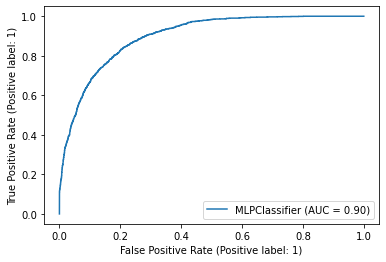

In [11]:
plot_roc_curve(red_neuronal_p1, X_validation, y_validation, response_method="predict_proba")
plt.show()

<h3> Preprocesamiento 2: Reducción por Frecuencia + OHE + Estandarización  </h3>

Similar al preprocesado anterior: reducimos por frecuencia de aparición algunas columnas, luego aplicaremos OHE a las columnas categoricas. Finalmente estandarizamos los datos.

In [12]:
X_p2 = reduce_by_frequency(X, ['barrio', 'religion', 'categoria_de_trabajo', 'estado_marital'], 0.15)
init_OHE(X_p2)
X_p2 = apply_OHE(X_p2)
X_p2 = standarize(X_p2)

In [13]:
X_train, X_validation, y_train, y_validation = train_test_split(
    X_p2, y, random_state=0, test_size=0.2, stratify=y
)

Buscamos los mejores hiperparametros para la Red Neuronal con GridSearchCV:

    - La métrica que se utiliza para comparar los modelos obtenidos en cada iteracion es roc_auc_score.
    - La mejor función de optimización de pesos obtenida en diferentes corridas con diferentes hiperparametros es Adam.
    - Las funciones de activación que mejor resultados tuvieron son tanh y logistic(sigmoidea), por lo que se limitaron las opciones a esos valores
    - Las hidden_layer_sizes con las que mejores resultados se obtuvieron fueron (30, 30) y (50, 50), por lo que se limitan las opciones a esos valores.
    - Los learning rates óptimos para las metricas que se calculan siempre se mantuvo entre 0.001 y 0.01, por lo se limitan las opciones a esos valores, además de mantenerse constante. 
    - Los alphas óptimos para las métricas que se calculan siempre se mantuvo entre 0.01 y 0.1, por lo se limitan las opciones a esos valores.
    - Las tolerancias óptimas para las métricas que se calculan siempre se mantuvo entre 0.00001 y 0.0001, por lo se limitan las opciones a esos valores.

In [14]:
parameters = {'activation': ['tanh', 'logistic'], 'solver':['adam'], 'hidden_layer_sizes': [(30,30), (50, 50)],
              'learning_rate_init': [0.001, 0.01], 'alpha':[0.01, 0.1], 'tol':[0.00001, 0.0001]}

clf = MLPClassifier(random_state=0)

gscv = GridSearchCV(
    clf,  parameters, scoring='roc_auc', n_jobs=-1, cv=5, return_train_score=True,
).fit(X_train, y_train)

In [15]:
print(f"Mejor score ROC-AUC en Entrenamiento: {gscv.best_score_}")
print(f"Mejores Parametros {gscv.best_params_}")

print(f"\nMejor score ROC-AUC en Validación: {gscv.score(X_validation, y_validation)}")

Mejor score ROC-AUC en Entrenamiento: 0.9130894200304457
Mejores Parametros {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': (50, 50), 'learning_rate_init': 0.001, 'solver': 'adam', 'tol': 1e-05}

Mejor score ROC-AUC en Validación: 0.9066509022719301


In [16]:
red_neuronal_p2 = gscv.best_estimator_
red_neuronal_p2

MLPClassifier(activation='tanh', alpha=0.1, hidden_layer_sizes=(50, 50),
              random_state=0, tol=1e-05)

Predecimos con el validation set:

In [17]:
y_pred_p2 = red_neuronal_p2.predict(X_validation)

### Métricas

In [18]:
print(classification_report(y_validation, y_pred_p2))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      4945
           1       0.68      0.69      0.69      1568

    accuracy                           0.85      6513
   macro avg       0.79      0.79      0.79      6513
weighted avg       0.85      0.85      0.85      6513



Mostramos la matriz de confusión:

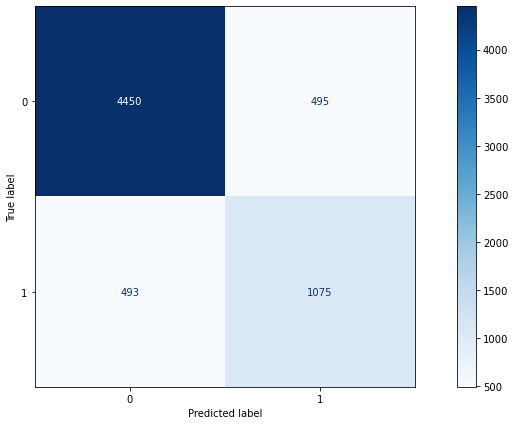

In [19]:
aux.plot_cm(red_neuronal_p2, X_validation, y_validation)

Mostramos la curva roc:

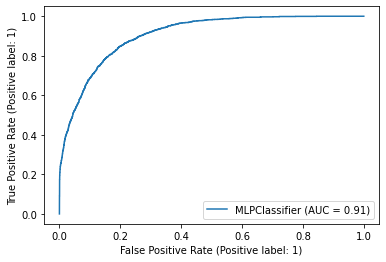

In [20]:
plot_roc_curve(red_neuronal_p2, X_validation, y_validation, response_method="predict_proba")
plt.show()

<h3> Preprocesamiento 3: Elimino Columnas + Reducción por Frecuencia + OHE +  Estandarización</h3>

En este preprocesamiento eliminamos las columnas 'religion', 'barrio' y 'categoria de trabajo' ya que en el análisis del TP1 concluimos que no aportaban demasiada información. Además agrupamos las categorias que contienen menos del 5% de los datos. Tambien se aplica One Hot Encoding y Estandarización a los datos.

In [21]:
X_p3 = eliminar_features(X, ['religion', 'barrio', 'categoria_de_trabajo'])
X_p3 = reduce_by_frequency(X_p3, ['estado_marital', 'trabajo'], 0.05)

In [22]:
init_OHE(X_p3)
X_p3 = apply_OHE(X_p3)
X_p3 = standarize(X_p3)

In [23]:
X_train, X_validation, y_train, y_validation = train_test_split(
    X_p3, y, random_state=0, test_size=0.2, stratify=y
)

Buscamos los mejores hiperparametros para la Red Neuronal con GridSearchCV:

    - La métrica que se utiliza para comparar los modelos obtenidos en cada iteracion es roc_auc_score.
    - La mejor función de optimización de pesos obtenida en diferentes corridas con diferentes hiperparametros es Adam.
    - Las funciones de activación que mejor resultados tuvieron son tanh y logistic(sigmoidea), por lo que se limitaron las opciones a esos valores
    - Las hidden_layer_sizes con las que mejores resultados se obtuvieron fueron (30, 30) y (50, 50), por lo que se limitan las opciones a esos valores.
    - Los learning rates óptimos para las metricas que se calculan siempre se mantuvo entre 0.001 y 0.01, por lo se limitan las opciones a esos valores, además de mantenerse constante. 
    - Los alphas óptimos para las métricas que se calculan siempre se mantuvo entre 0.01 y 0.1, por lo se limitan las opciones a esos valores.
    - Las tolerancias óptimas para las métricas que se calculan siempre se mantuvo entre 0.00001 y 0.0001, por lo se limitan las opciones a esos valores.

In [24]:
parameters = {'activation': ['tanh', 'logistic'], 'solver':['adam'], 'hidden_layer_sizes': [(20,20), (30, 30)],
              'learning_rate_init': [0.001, 0.01], 'alpha':[0.01, 0.1], 'tol':[0.00001, 0.0001]}

clf = MLPClassifier(random_state=0)

gscv = GridSearchCV(
    clf,  parameters, scoring='roc_auc', n_jobs=-1, cv=5, return_train_score=True,
).fit(X_train, y_train)

In [25]:
print(f"Mejor score ROC-AUC en Entrenamiento: {gscv.best_score_}")
print(f"Mejores Parametros {gscv.best_params_}")

print(f"\nMejor score ROC-AUC en Validación: {gscv.score(X_validation, y_validation)}")

Mejor score ROC-AUC en Entrenamiento: 0.9116446834522274
Mejores Parametros {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': (20, 20), 'learning_rate_init': 0.001, 'solver': 'adam', 'tol': 1e-05}

Mejor score ROC-AUC en Validación: 0.9082240745135264


In [26]:
red_neuronal_p3 = gscv.best_estimator_
red_neuronal_p3

MLPClassifier(activation='tanh', alpha=0.1, hidden_layer_sizes=(20, 20),
              random_state=0, tol=1e-05)

Predecimos con el validation set:

In [27]:
y_pred_p3 = red_neuronal_p3.predict(X_validation)

### Métricas

In [28]:
print(classification_report(y_validation, y_pred_p3))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      4945
           1       0.75      0.57      0.65      1568

    accuracy                           0.85      6513
   macro avg       0.81      0.76      0.78      6513
weighted avg       0.84      0.85      0.84      6513



Mostramos la matriz de confusión:

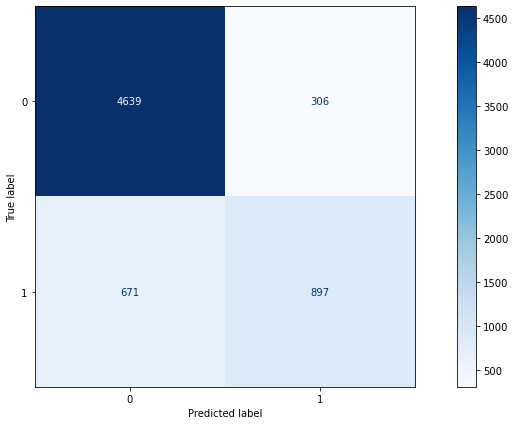

In [29]:
aux.plot_cm(red_neuronal_p3, X_validation, y_validation)

Mostramos la curva roc:

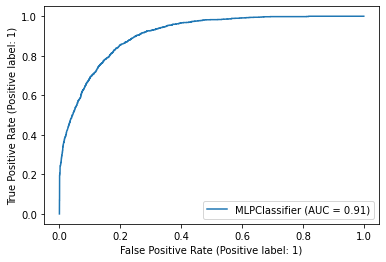

In [30]:
plot_roc_curve(red_neuronal_p3, X_validation, y_validation, response_method="predict_proba")
plt.show()

<h1>Conclusión</h1>

La red con el tercer preprocesamiento obtiene el mejor de los tres resultados. Predice mejor los casos sin alto valor adquisitivo, y peor los casos con alto valor adquisitivo.

<h1>Predicción</h1>

In [31]:
ids, X_holdout = aux.get_holdout_set()

In [32]:
X_holdout = init_dataset(X_holdout)

In [33]:
X_holdout_p3 = eliminar_features(X_holdout, ['religion', 'barrio', 'categoria_de_trabajo'])
X_holdout_p3 = reduce_by_frequency(X_holdout_p3, ['estado_marital', 'trabajo'], 0.05)
X_holdout_p3 = apply_OHE(X_holdout_p3)
X_holdout_p3 = standarize(X_holdout_p3)

In [34]:
red_neuronal_pred = red_neuronal_p3.predict(X_holdout_p3)

In [35]:
aux.create_prediction(ids, red_neuronal_pred, file_name='red_neuronal')